# The World Of LLMs

Generative AI and large language models (LLMs) have transformed the way businesses harness data to derive insights. These models possess incredible power, yet their effectiveness depends heavily on the context and quality of data provided.

Services like Amazon Bedrock have further amplified these opportunities ***and challenges***, making it easier for businesses to integrate Gen AI into their operations and innovate more efficiently.

Amid this rapid, transformative evolution, Retrieval-Augmented Generation (RAG) is emerging as a key approach for effective enterprise use cases.

RAG enhances LLMs by connecting them to external knowledge/data sources, thus enriching their responses with up-to-date and contextually relevant information. This technique significantly improves the quality and accuracy of the generated outcomes, allowing enterprises to adapt quickly to new challenges.

By incorporating relevant data at the time of generation, RAG makes LLMs more responsive to specific business needs.  

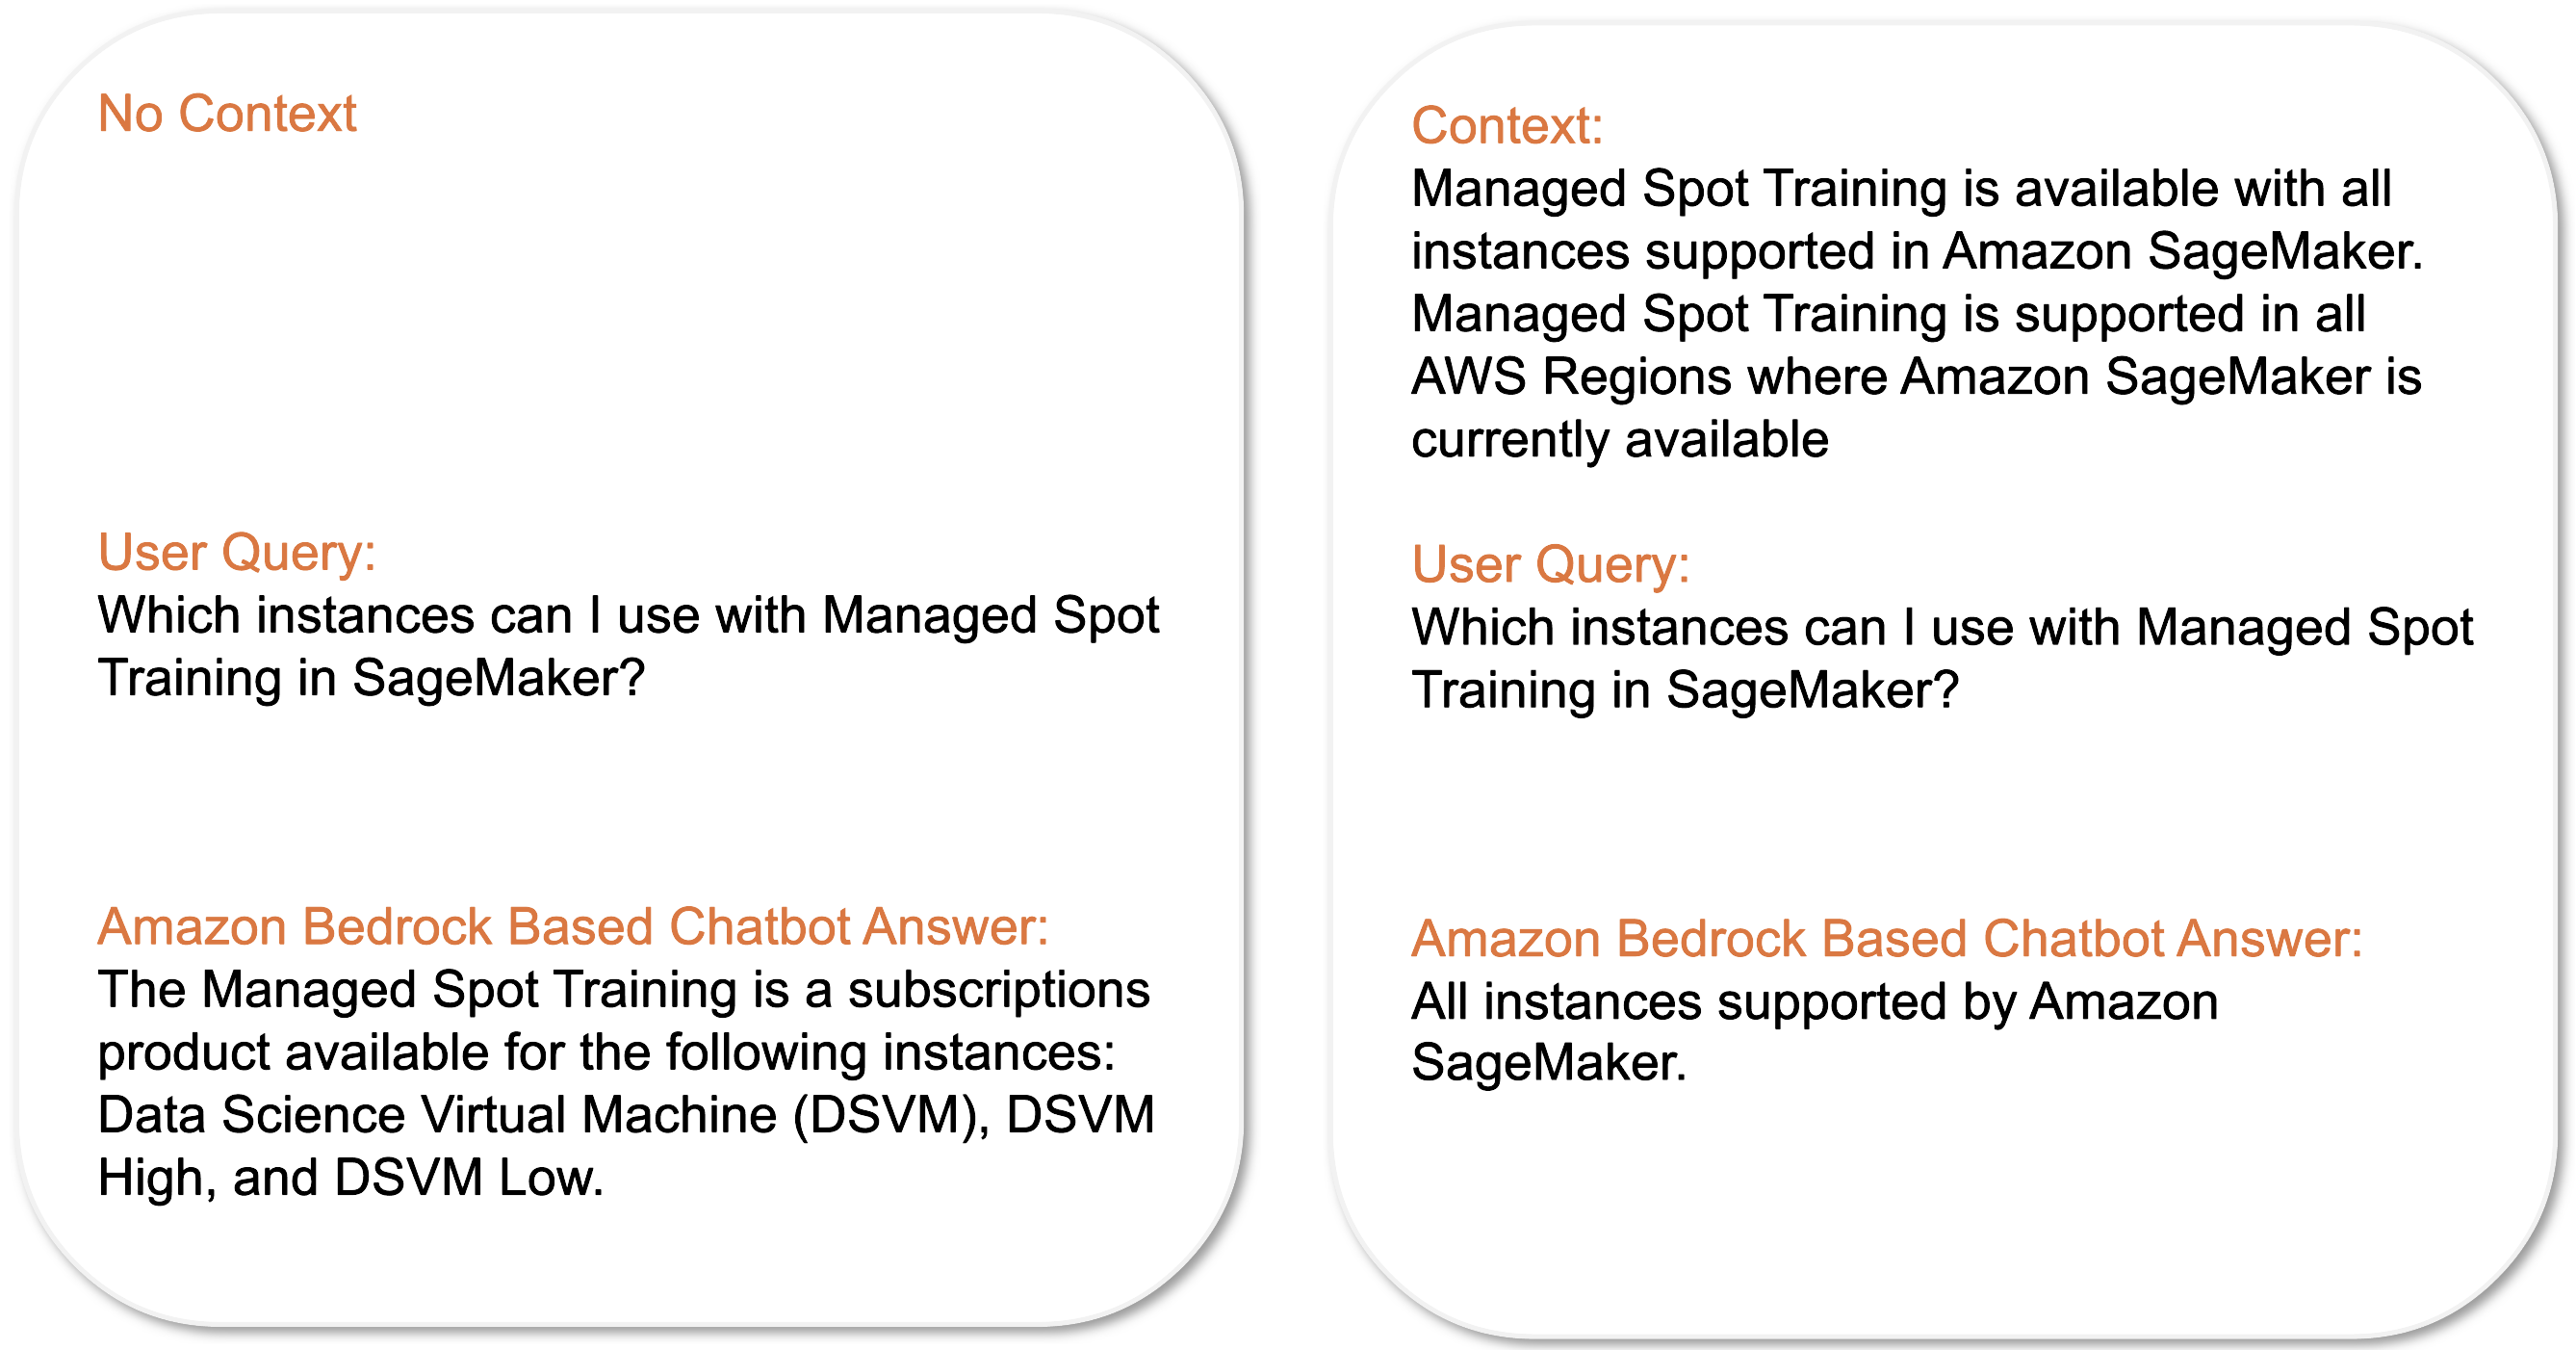

# When to Use RAG

The approach selection is influenced by three key business factors: the need for domain-specific solutions, access to current information, and the extent of required domain adaptation.



---



While there are several technical considerations, they generally fall under cost, effort, and technical expertise.

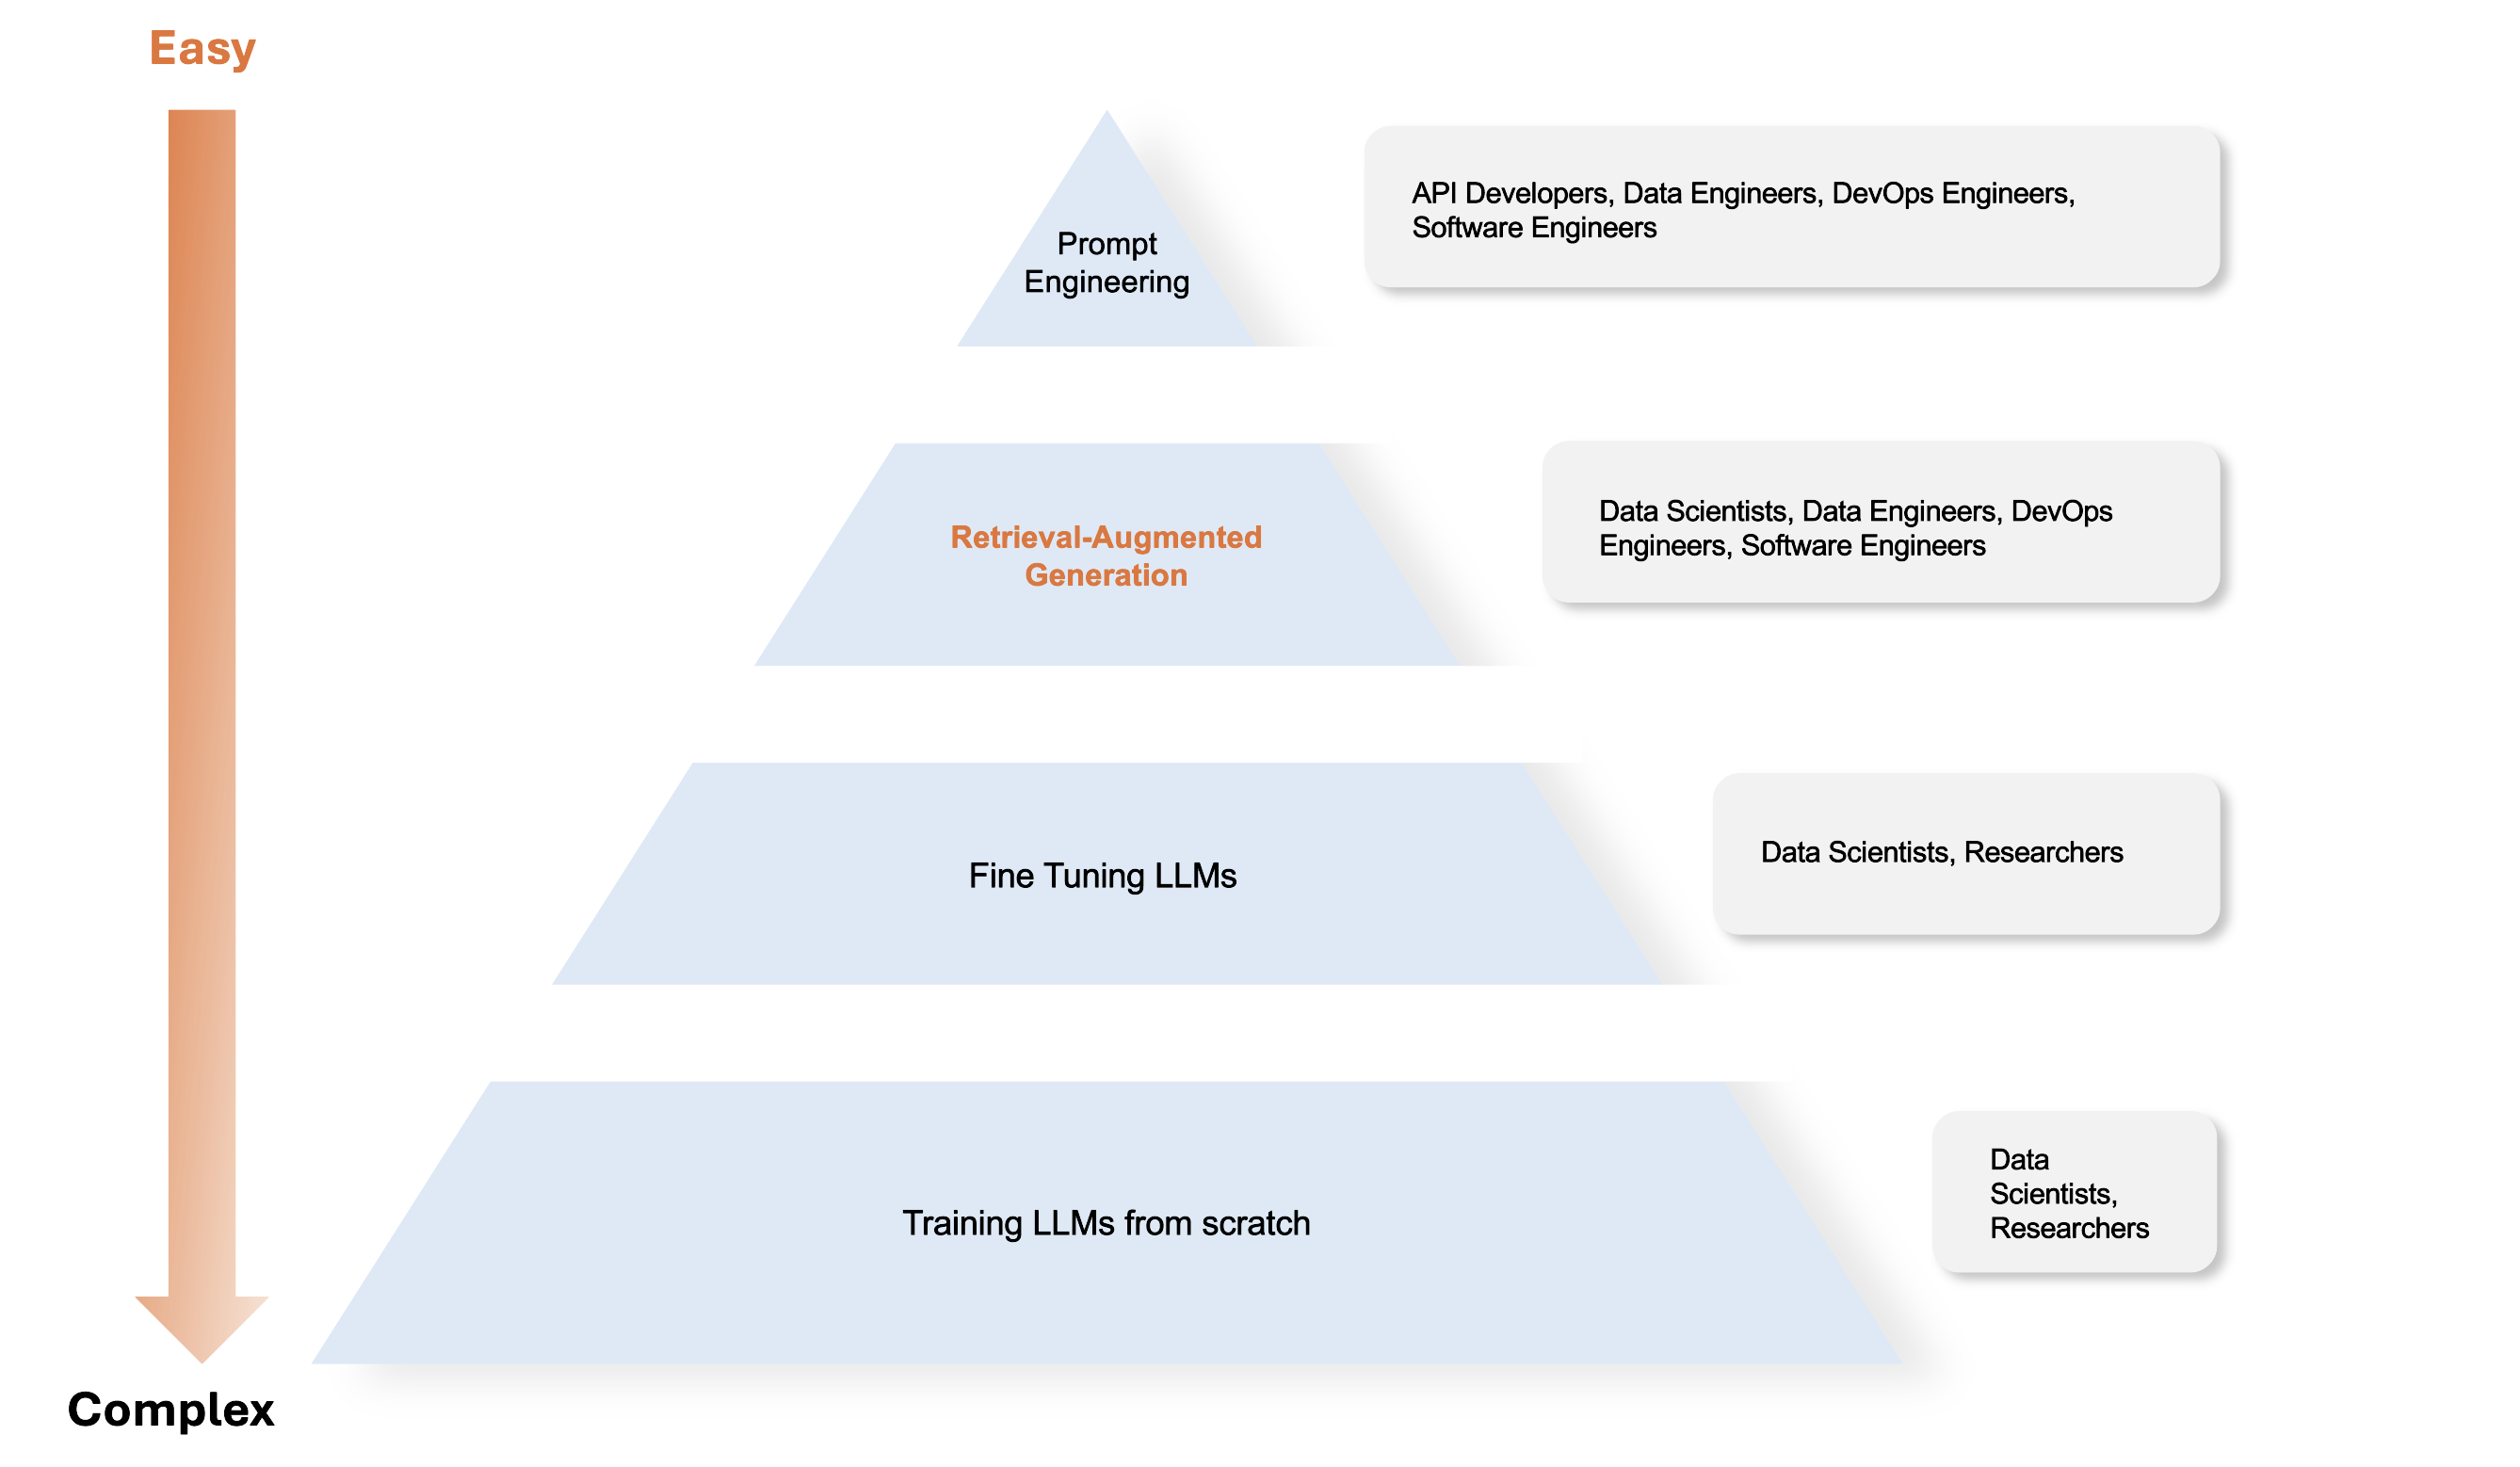

I have created a guideline that help me navigate with this exact question on a daily basis.

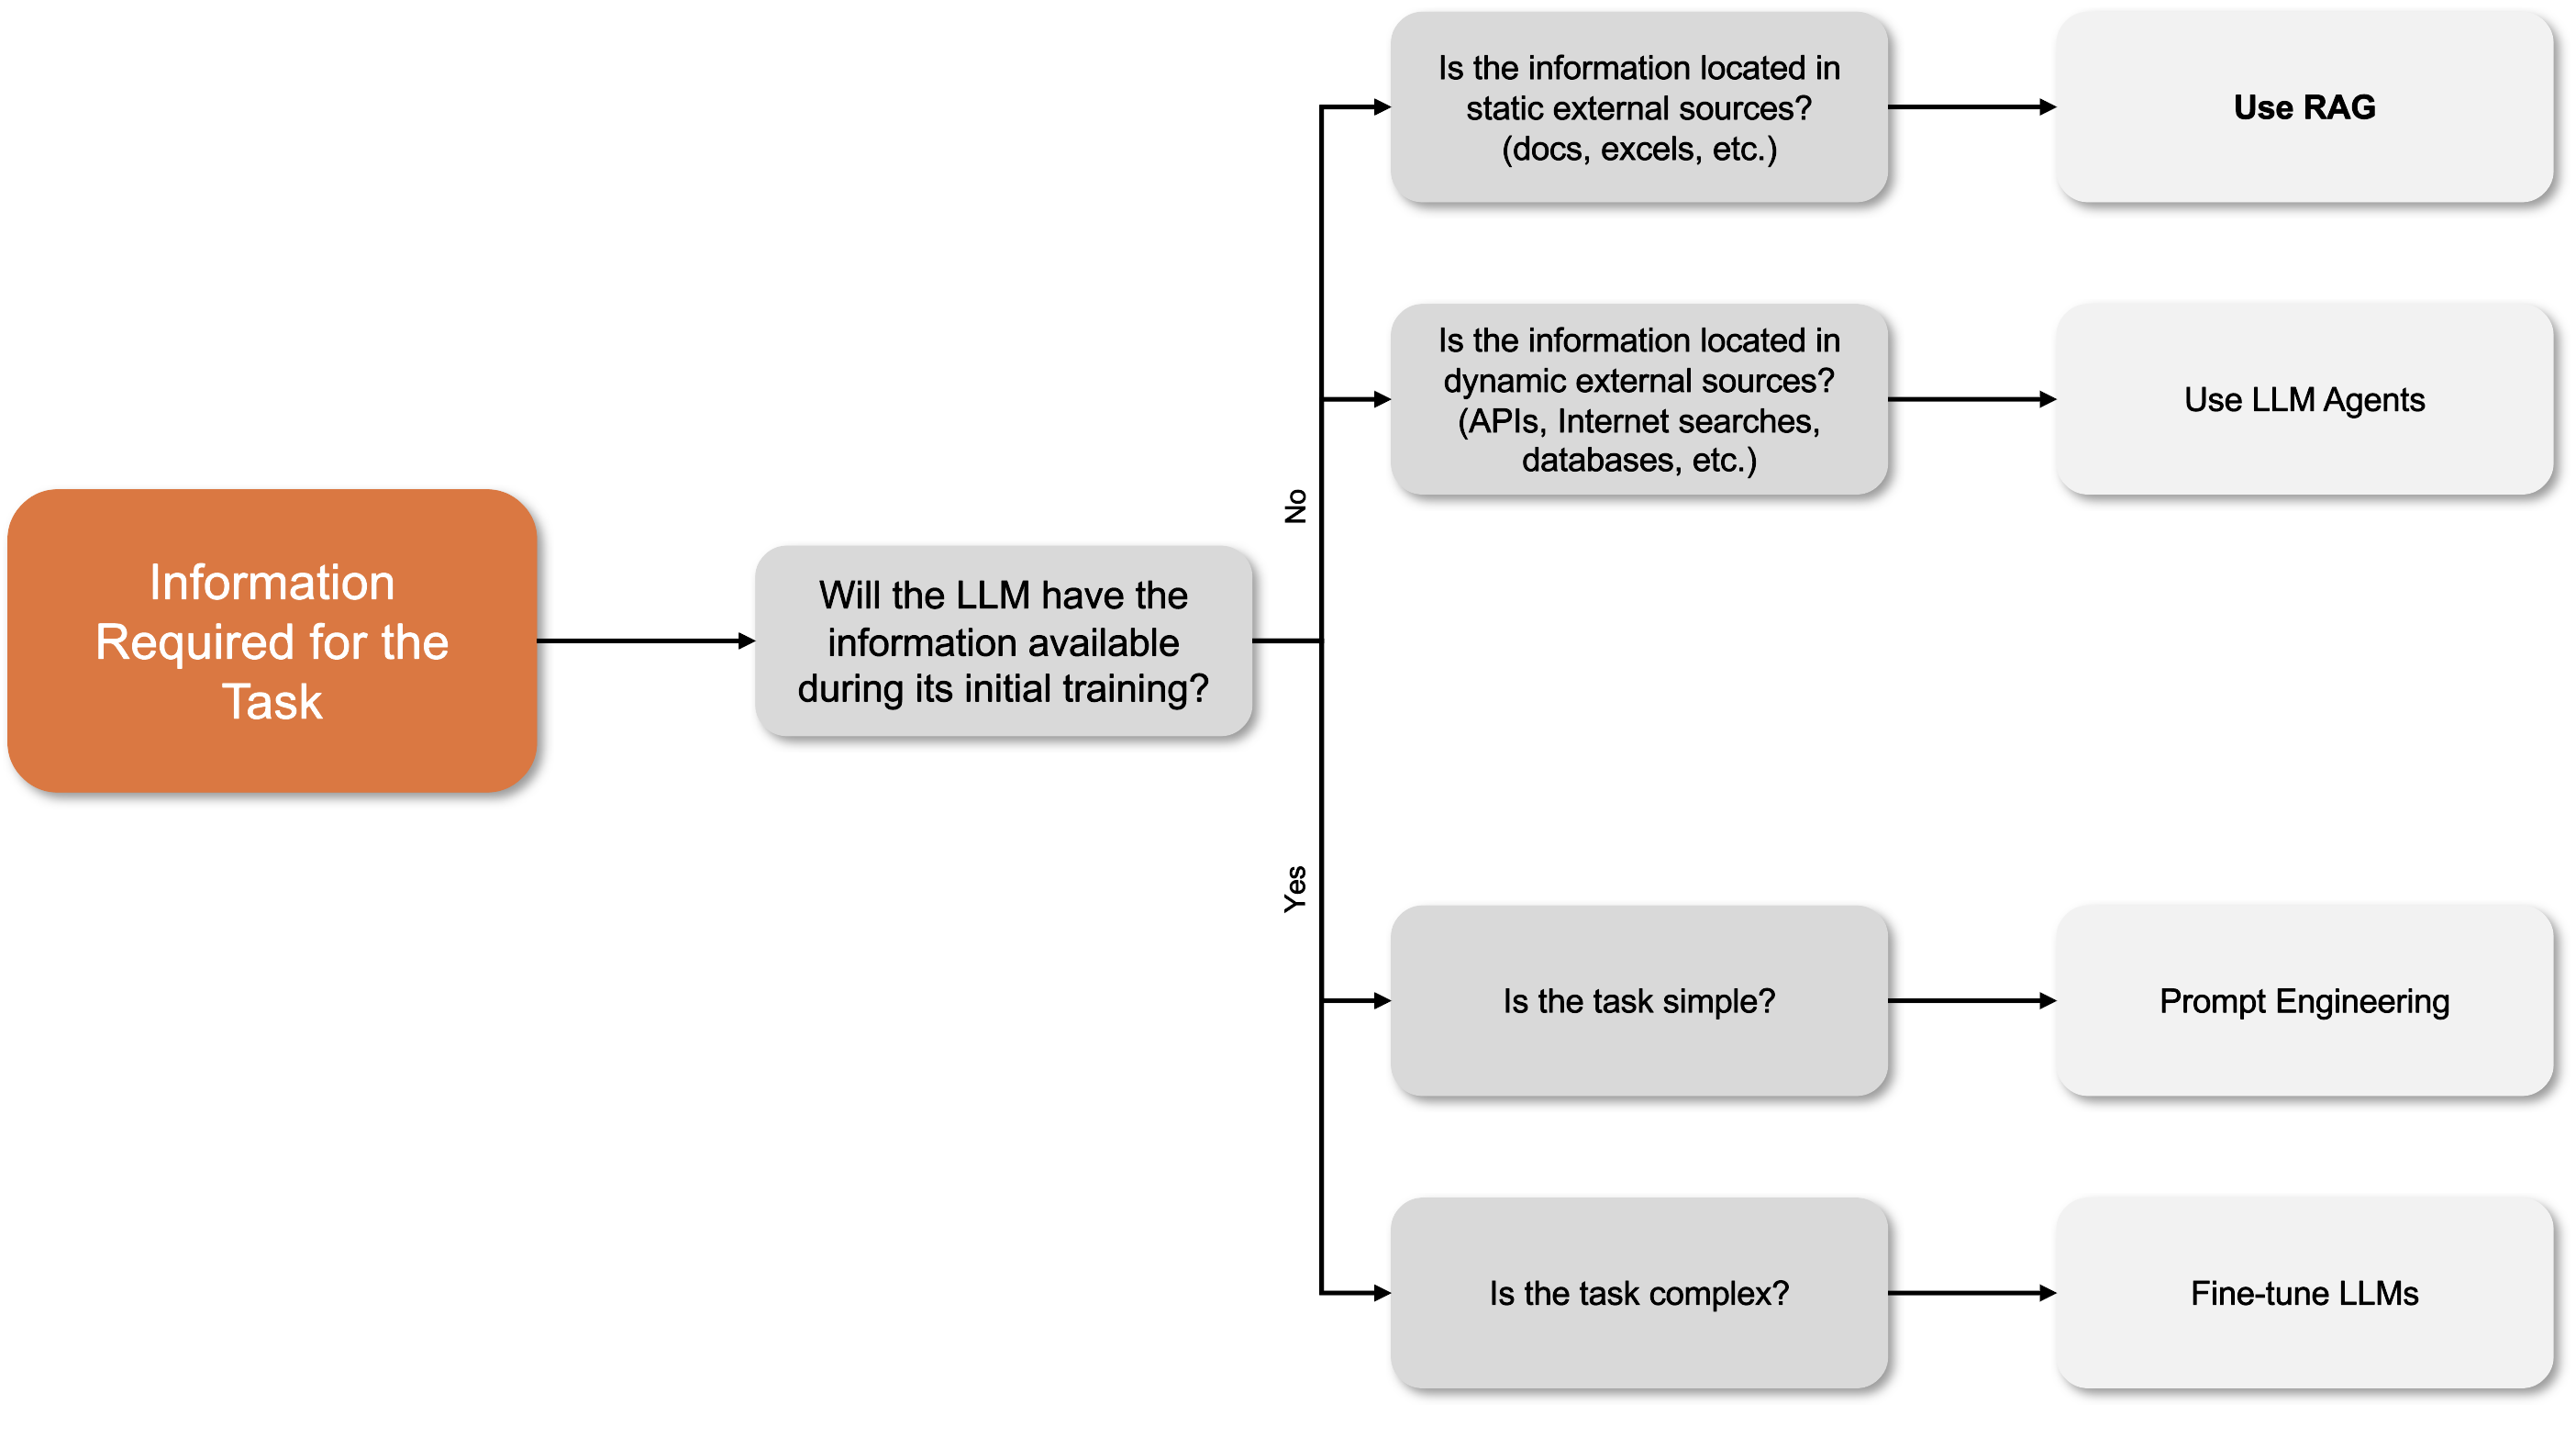

Notice how training an LLM model from scratch is not in the guidelines altogether. Unless you are doing research, training an LLM model from scratch should be the last resort.

It is too cost and effort intensive and you will not get to know the performance until the training has been completed.

Let’s take a couple of scenarios and understand how this guideline can be implemented.

**Scenario 1:** You want to use LLMs to generate medical diagnosis using medical records

Will the LLM have the information available during its initial training? Most large language models are trained on a variety of easily available public data. Medical datasets are easily available and shared on public mirrors such as Kaggle, Hugging Face Datasets, etc. So, yes, the LLM will have the information available during its initial training.

Is the task simple? No.

Is the task complex? Yes. So, we fine-tune LLMs.

**Scenario 2:** You want to develop a chatbot that helps your team access all company policy documents and answers any related questions.

Will the LLM have the information available during its initial training? No, the LLM will not have the information available during its initial training, as this a company-specific data which is most probably not public

Is the information located in static external sources? (docs, excels, etc.)? Yes. These documents (whilst not entirely static) rarely change. So, we will use RAG.

# Deep-dive into RAG

Retrieval-augmented generation (RAG) combines two cutting-edge technologies: information retrieval (IR) and natural language generation (NLG), or text generation.

To appreciate the innovation RAG offers, it’s essential to understand the complex interaction between these two elements.

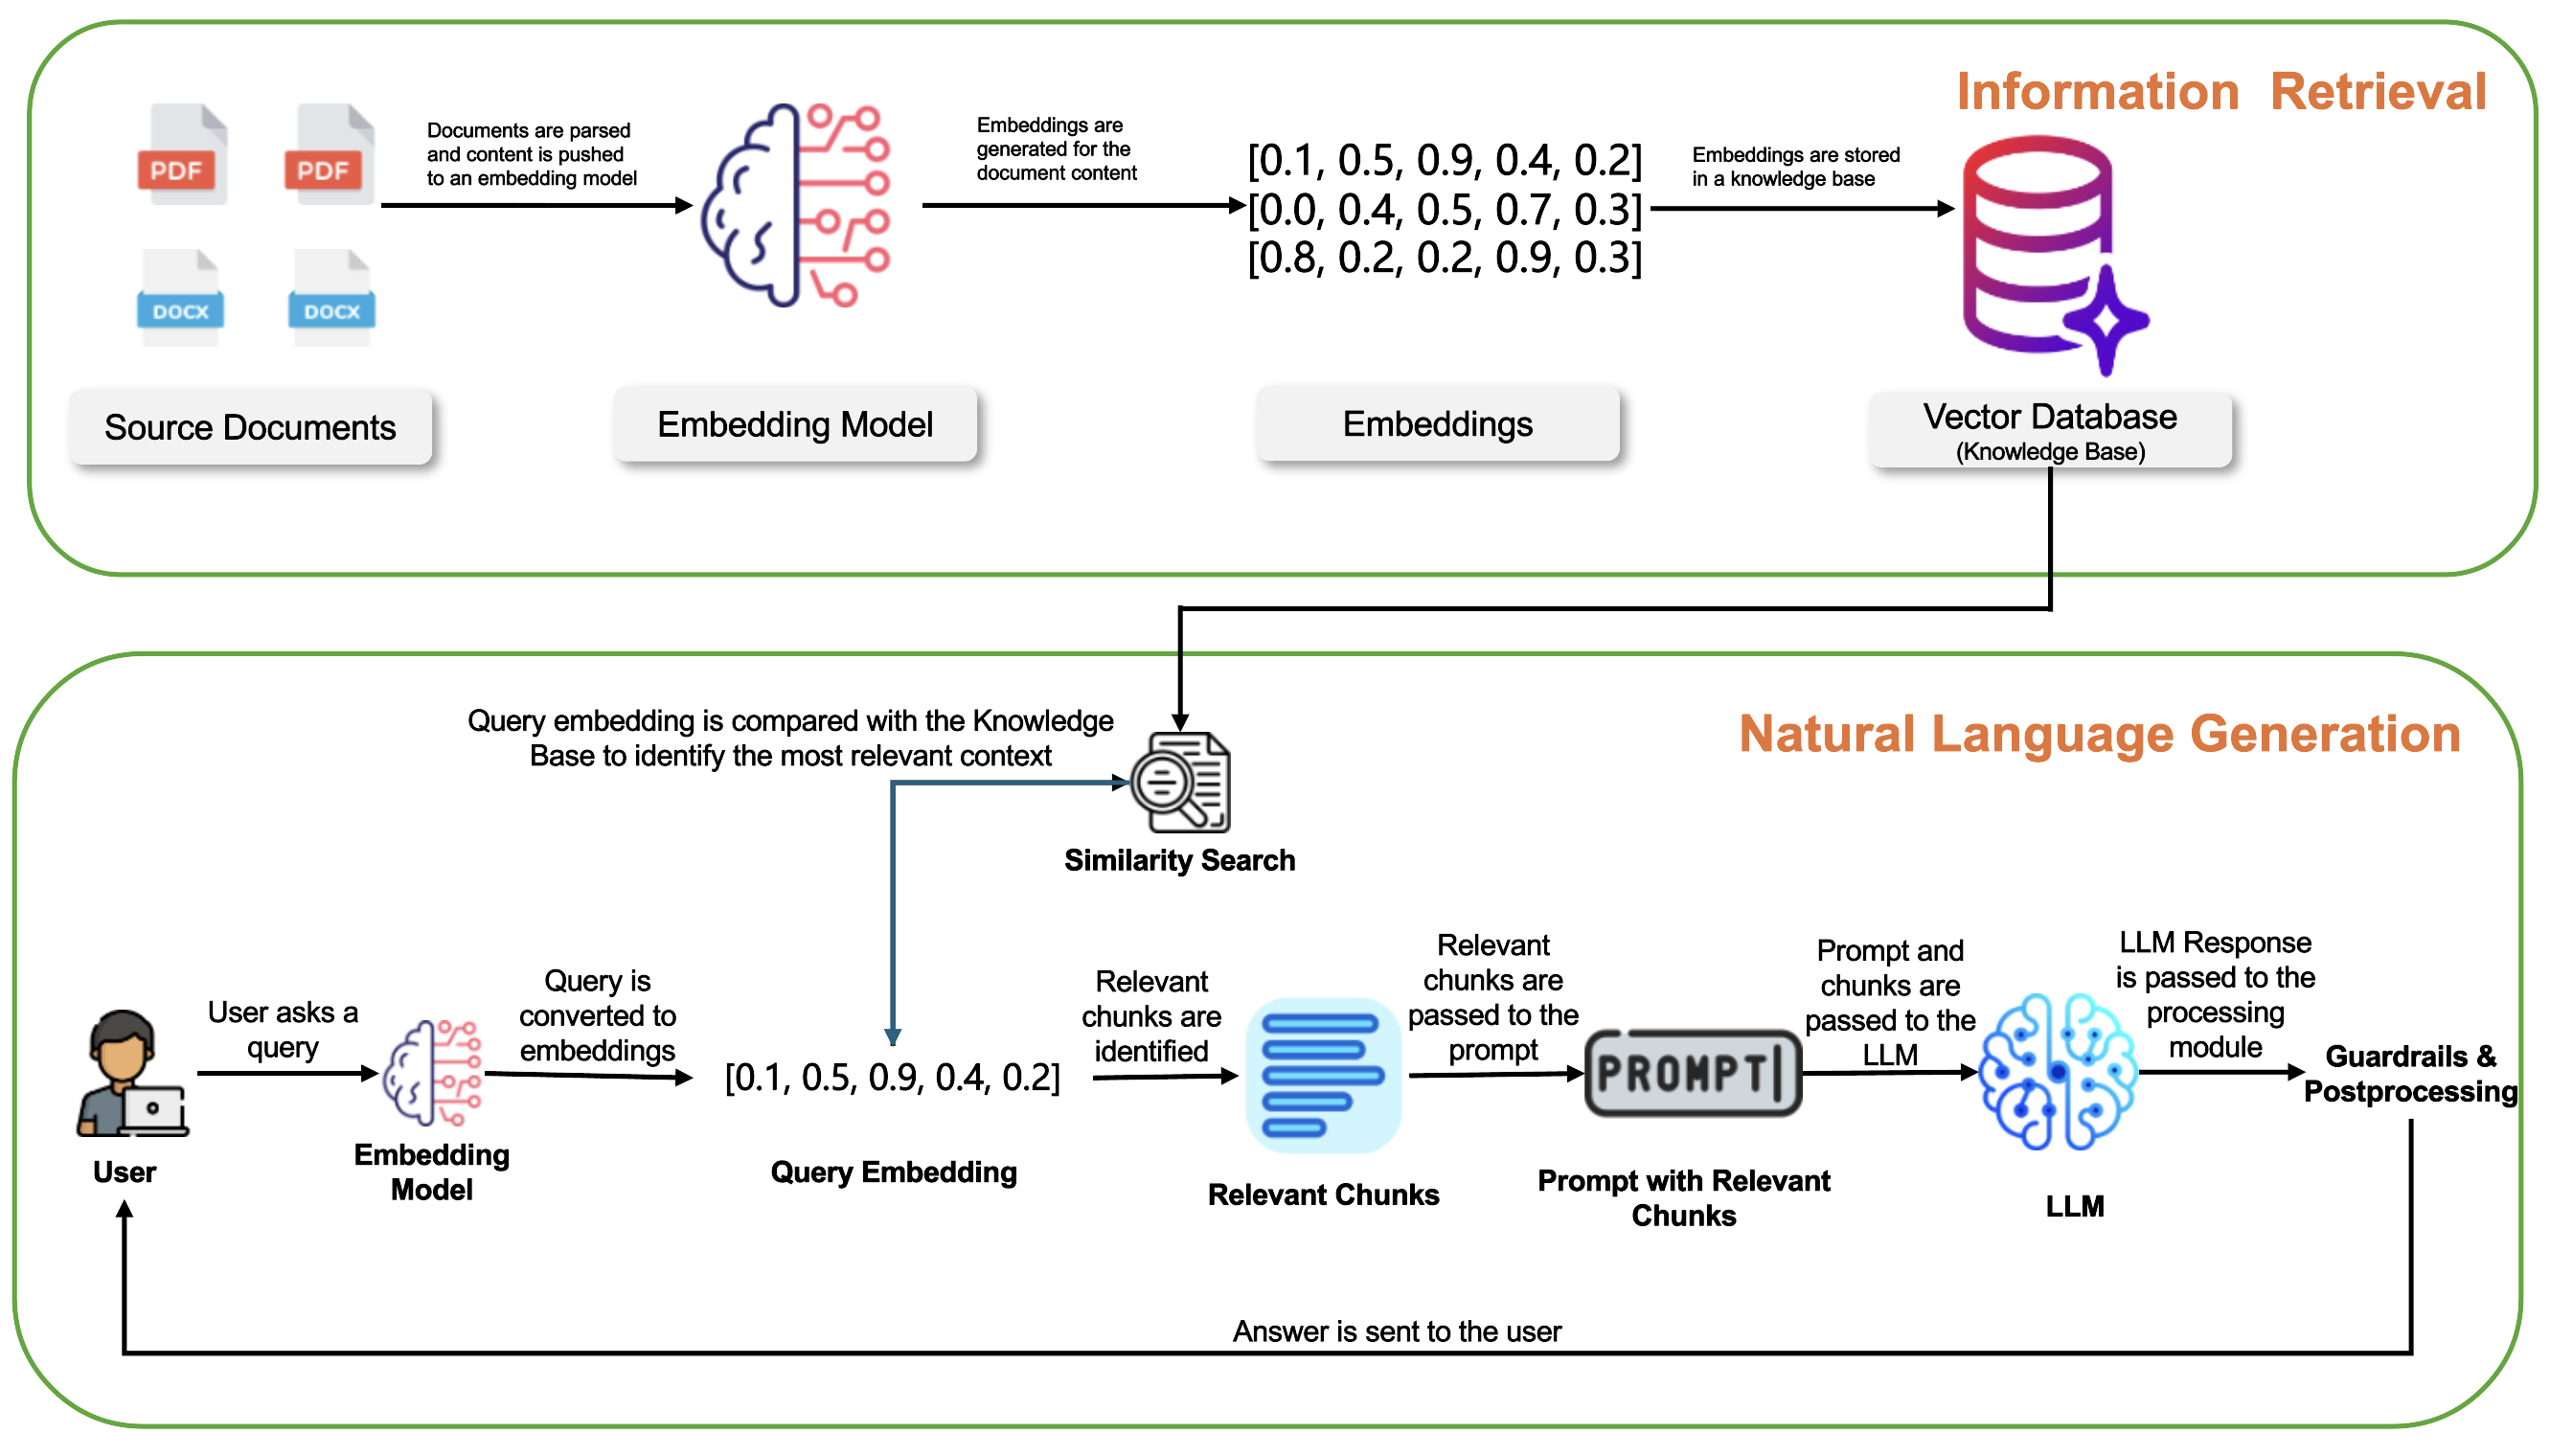

## Information Retrieval – the quest for relevance:


1. **Document Preparation**: Source documents (e.g., PDFs, DOCX files) are selected for processing.

2. **Embedding Generation**: The documents' content are converted into numerical representations (embeddings) using an advanced embedding model. These embeddings capture the meaning and context of the content.

3. **Knowledge Base Creation**: The generated embeddings are stored in a vector database, also known as a knowledge base.

4. **Query Embedding**: When a user submits a query, it is transformed into an embedding using the same embedding model.

5. **Similarity Search**: The query embedding is compared against the embeddings in the knowledge base to identify the most relevant data chunks.

6. **Information Retrieval**: The system retrieves and presents the most relevant information aligned with the user's query's intent.



To be effective in business applications, the IR system incorporates an understanding of industry-specific terminology and nuances.

## Natural Language Generation – the art of articulation:


1. **Information Integration**: Retrieved data chunks are combined with the user’s query to form a detailed prompt.

2. **Input to Language Model**: The detailed prompt is fed into a large language model (LLM).

3. **Response Generation**: The LLM generates a well-structured, contextually rich, and human-like response by synthesizing the information.

4. **Post-Processing**: The generated response undergoes refinement to enhance quality, clarity, and relevance.

5. **Guardrail Filtering**: The response is filtered through predefined guardrails to ensure adherence to standards of accuracy, insight, and user-friendliness.

6. **Response Delivery**: The polished and insightful response is presented to the user, delivering a seamless and enriching experience.

# RAG Options in AWS

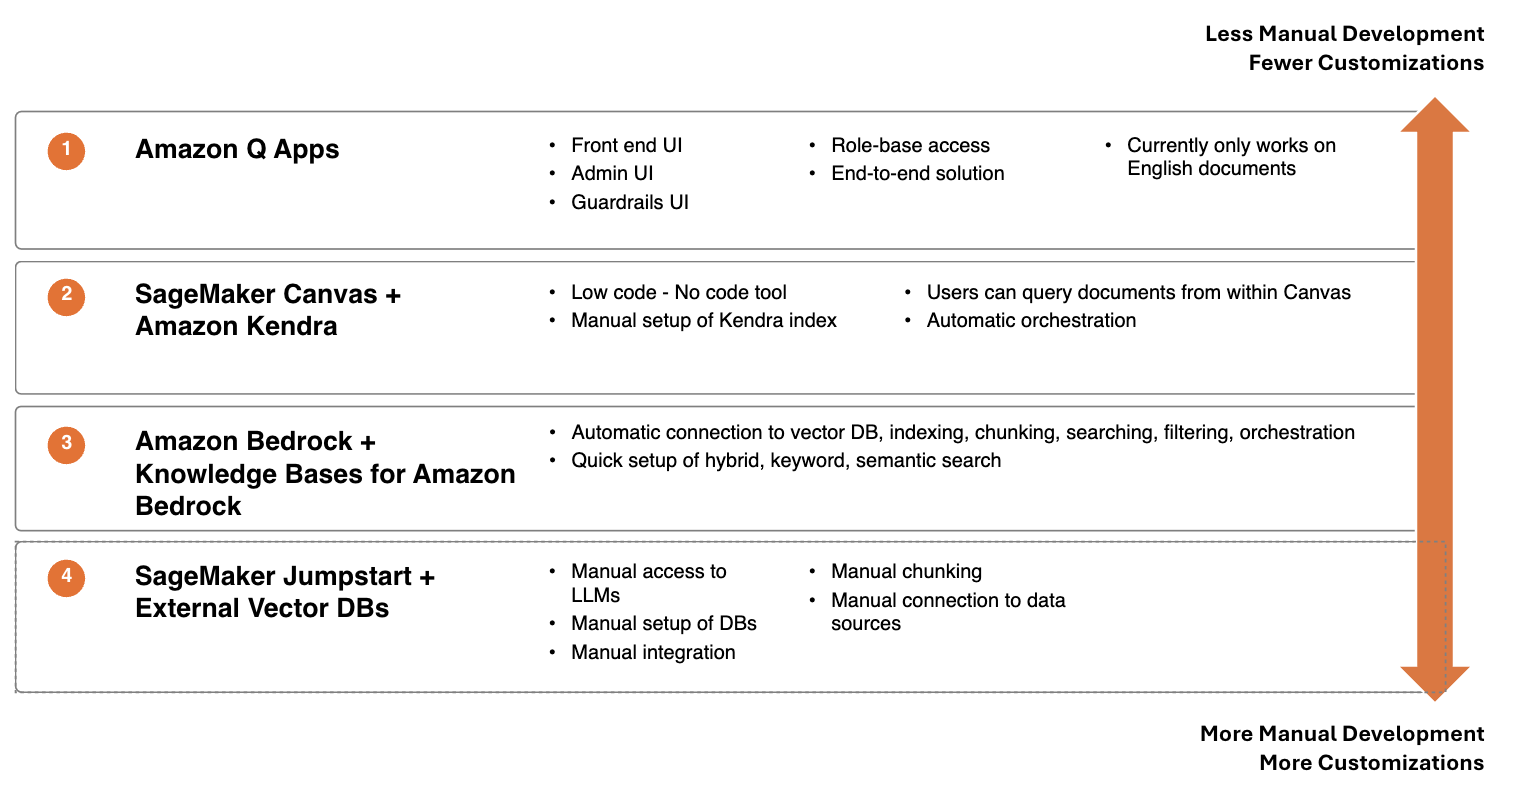

## Reference AWS Architecture to implement RAG-based chatbot system
Using option 3 (Amazon Bedrock + Knowledge Bases for Amazon Bedrock)

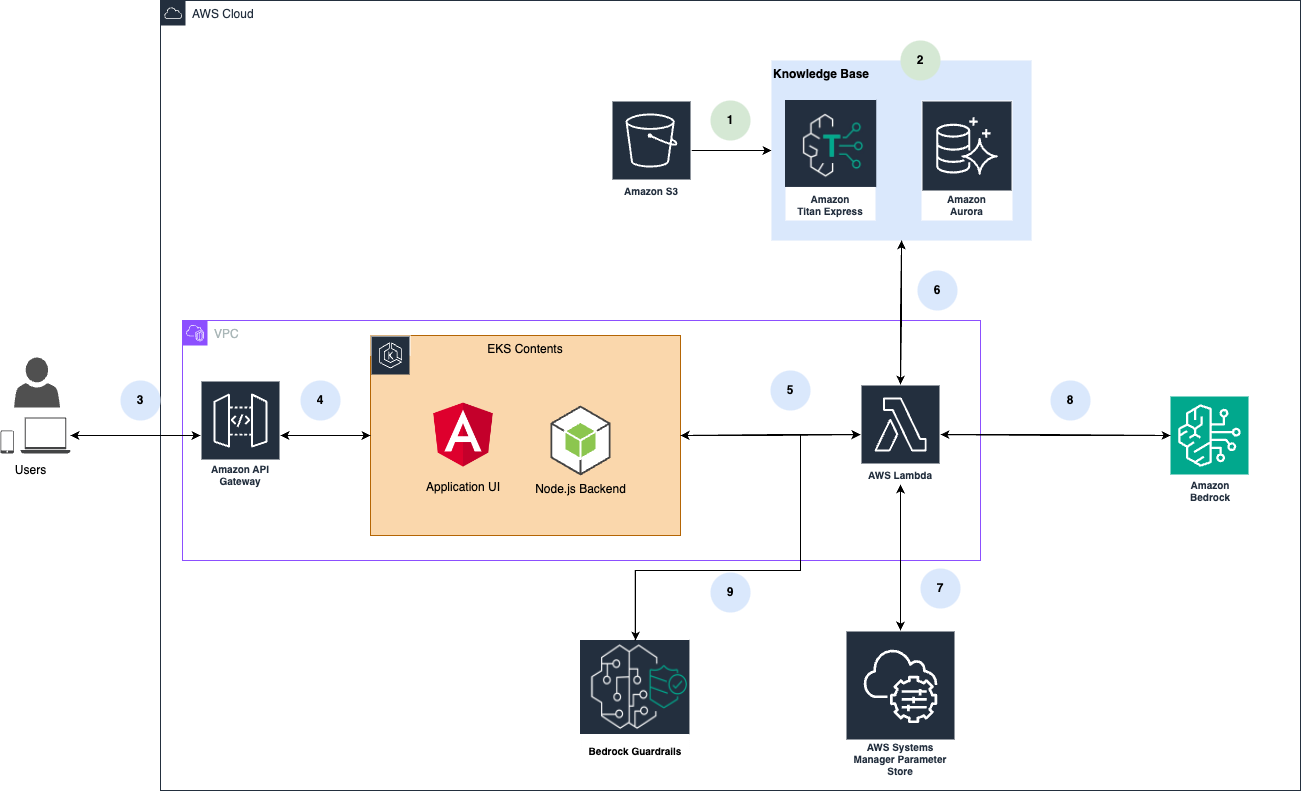

1. Document artifacts (PDFs, DOCs, Excels, etc.) are placed in S3. These documents are the reference material for the chatbot service.

2. The content of these documents are parsed, and embeddings are generated using Amazon’s proprietary Titan Express Model. These embeddings are stored in Amazon Aurora PostgreSQL.

3. Users access the chatbot application through various devices (laptops, tablets, phones), and sends in a query. Amazon API Gateway serves as the intermediary that handles API requests from the user's devices, routing them appropriately to the backend.

4. The API Gateway routes user requests to the Amazon EKS, which hosts both the Application UI (built in Angular) and the Node.js backend. It is able to handle multiple requests and scale vertically.  

5. It processes user requests and passes them to a Amazon Lambda function. The Lambda function interacts with various AWS services and performs a lot of functions.

6. The Lambda function uses Amazon Titan Express to convert the user query to embeddings, compares it to the knowledge base (Amazon Aurora) and retrieves the most relevant portions of the contents of the documents within S3.

7. The Lambda function attaches this relevant portion or chunk to the prompt. The prompt is, first, retrieved from the AWS Systems Manager Parameter Store.

8. The prompt with the relevant context is pushed to Amazon Bedrock, which generates human-like responses to the user's query using a pre-trained foundation model (LLM).

9. Bedrock Guardrails ensures that the responses generated by the Bedrock model are aligned with the safety, ethical standards, and business rules. This step could involve filtering, validating, or post-processing the generated answers to prevent harmful or incorrect responses.

10. After the relevant context is retrieved, response is generated, validated, and checked against guardrails, it is sent back to the Node.js Backend and eventually returned to the user via the Amazon API Gateway.







# Challenges of RAG

* **Managing multiple data sources:** Integrating and maintaining various structured and unstructured data sources can be complex, requiring consistent updates and handling of disparate formats.

* **Creating vector embeddings for large volumes of data:** Generating vector embeddings for large datasets is computationally intensive, requiring significant processing power and memory resources.

* **Incremental updates to vector store:** Continuously updating the vector store with new data while maintaining data consistency and minimizing downtime can be challenging.

* **Coding effort:** Implementing RAG requires significant development work to integrate models, vector databases, and retrieval systems effectively.

* **Scaling retrieval mechanism:** As data grows, efficiently scaling the retrieval system to maintain fast and accurate results becomes difficult without sophisticated indexing and infrastructure.

* **Orchestration:** Coordinating various components like model inference, retrieval, and ranking in a seamless pipeline requires effective orchestration.

* **Ethical considerations - bias and fairness:** Ensuring the retrieval and generation processes are free from bias and uphold fairness is crucial to avoid ethical concerns.

* **Observability and performance monitoring:** Maintaining clear visibility into the system’s performance and quickly identifying and addressing bottlenecks or failures is essential for smooth LLM operations.

# Some Interesting Links

* https://huggingface.co/spaces/mteb/leaderboard
* https://benchmark.vectorview.ai/vectordbs.html
* https://arxiv.org/html/2407.08275v1
* https://docs.chainlit.io/get-started/overview